In [1]:
import sys
import os

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

sys.path.append(os.path.abspath("../src"))





In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from src.yf_tesla_modeling import find_best_arima_params,forecast_with_arima,train_arima_model,evaluate_forecast,create_dataset,build_and_train_lstm,predict_and_evaluate_lstm# Plot the training data, actual test data, and the forecast to see how well the model did

In [3]:
data = pd.read_csv(r"C:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\data\combined_2015-07-01_to_2025-08-01.csv")


In [4]:
# --- 2. Prepare the DataFrame ---
# Convert the 'Date' column into a proper datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index, which is standard for time series analysis
data.set_index('Date', inplace=True)

# --- 3. Select and Clean the TSLA Data (as we discussed) ---
# Now you can select the 'TSLA.Adj Close' column, which we know exists
tsla_df = data[['TSLA.Adj Close']]

# Rename the column to make the rest of the code simpler
tsla_df = tsla_df.rename(columns={'TSLA.Adj Close': 'Adj Close'})

# Clean the data to ensure business day frequency and fill gaps
tsla_df = tsla_df.asfreq('B').ffill().bfill()


# --- 4. Verify the result ---
print("Data loaded and prepared successfully!")
print("Here are the first 5 rows of your clean TSLA data:")
print(tsla_df.head())

Data loaded and prepared successfully!
Here are the first 5 rows of your clean TSLA data:
            Adj Close
Date                 
2015-07-01  17.943333
2015-07-02  18.667999
2015-07-03  18.667999
2015-07-06  18.648001
2015-07-07  17.858667


In [5]:
# Cell 1: Imports and Setup
import yfinance as yf
 # Assuming your file is named arima_modeler.py

split_date = '2024-01-01'
train = tsla_df[tsla_df.index < split_date]

In [6]:
# This will count the total number of missing values in the 'Adj Close' column
missing_value_count = data['TSLA.Adj Close'].isnull().sum()

print(f"Total number of missing values: {missing_value_count}")

Total number of missing values: 0


In [7]:
# This line will print the actual column names in your DataFrame
print("The actual column names are:")
print(data.columns)

The actual column names are:
Index(['TSLA.Open', 'TSLA.High', 'TSLA.Low', 'TSLA.Close', 'TSLA.Adj Close',
       'TSLA.Volume', 'SPY.Open', 'SPY.High', 'SPY.Low', 'SPY.Close',
       'SPY.Adj Close', 'SPY.Volume', 'BND.Open', 'BND.High', 'BND.Low',
       'BND.Close', 'BND.Adj Close', 'BND.Volume'],
      dtype='object')


In [8]:
# Assuming 'combined_df' is your DataFrame
print(data.dtypes)

TSLA.Open         float64
TSLA.High         float64
TSLA.Low          float64
TSLA.Close        float64
TSLA.Adj Close    float64
TSLA.Volume         int64
SPY.Open          float64
SPY.High          float64
SPY.Low           float64
SPY.Close         float64
SPY.Adj Close     float64
SPY.Volume          int64
BND.Open          float64
BND.High          float64
BND.Low           float64
BND.Close         float64
BND.Adj Close     float64
BND.Volume          int64
dtype: object


In [9]:
split_date = '2024-01-01'
train = tsla_df[tsla_df.index < split_date]

# Cell 3: Call the function and get the best order
# Pass the correct Series to your function
# Corrected code with .dropna()
auto_model = find_best_arima_params(train['Adj Close'])

# .order is an attribute (a variable), not a function. You access it directly.
best_order = auto_model.order 

print(f"\nBest ARIMA order found: {best_order}")

Running auto_arima to find the best model parameters...
Performing stepwise search to minimize aic


c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ABC\Desktop\10Acadamy\w

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14066.624, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14065.901, Time=0.11 sec


c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14065.756, Time=0.18 sec


c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14065.762, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14064.621, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.550 seconds

Best ARIMA order found: (0, 1, 0)


c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


This result is a classic and very important finding in financial time series analysis.

The `auto_arima` function has determined that the best statistical model for the TSLA stock price data is **ARIMA(0, 1, 0)**.

## What This Means: A Random Walk 🎲

An ARIMA(0, 1, 0) model is known as a **Random Walk**. Let's break down what each number means:

* **`p=0` (Autoregressive):** The model does not use any past price values to predict the next price.
* **`d=1` (Integrated):** The data needed one round of differencing to become stationary. This means the model is focused on predicting the daily *change* in price, not the price level itself.
* **`q=0` (Moving Average):** The model does not use any past forecast errors to improve its predictions.

When you combine these, the model essentially says that the change in price from one day to the next is random noise. The mathematical formula for a random walk is:

$$Y_t = Y_{t-1} + \epsilon_t$$

In plain English, this means:

> **Tomorrow's Price = Today's Price + Unpredictable Random Change**

This result strongly supports the **Efficient Market Hypothesis (EMH)**, which states that stock prices already reflect all available information. Therefore, past price movements cannot be used to predict future movements, making the daily changes effectively random.


In [10]:
test = tsla_df[tsla_df.index >= split_date]
fitted_model = train_arima_model(train['Adj Close'], best_order)
forecast =forecast_with_arima(fitted_model, steps=len(test))
forecast.index = test.index # Align forecast index with test set for plotting


Training final ARIMA(0, 1, 0) model...
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2218
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7031.311
Date:                Sun, 10 Aug 2025   AIC                          14064.621
Time:                        02:39:06   BIC                          14070.325
Sample:                    07-01-2015   HQIC                         14066.705
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        33.2890      0.384     86.711      0.000      32.537      34.041
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):             12407.83
Prob(Q)

In [11]:
# Calculate and display the performance metrics.
metrics = evaluate_forecast(test['Adj Close'], forecast)


--- Forecast Evaluation Metrics ---
Mean Absolute Error (MAE): 63.7119
Root Mean Squared Error (RMSE): 78.9858
Mean Absolute Percentage Error (MAPE): 0.2415


Here is an interpretation of your forecast evaluation metrics.

These numbers give us a clear picture of the ARIMA model's performance on the test data. In short, they indicate a significant, though not unexpected, level of error.

---
## ## Mean Absolute Error (MAE): 63.71

**What it means:** This is the most straightforward metric. It tells you that, on average, the model's price forecast was off by about **$63.71** on any given day in the test period.

---
## ## Root Mean Squared Error (RMSE): 78.99

**What it means:** Like MAE, this measures the average error in dollars. However, the RMSE **penalizes larger errors more heavily** than smaller ones.

**The Insight:** Your RMSE (**$78.99**) is noticeably higher than your MAE (**$63.71**). This indicates that while the *average* error was around $64, there were some days where the model's forecast was *very* wrong, and these large errors are inflating the RMSE value.

---
## ## Mean Absolute Percentage Error (MAPE): 24.15%

**What it means:** This is often the most intuitive metric. It shows that, on average, the model's forecast was **24.15%** different from the actual stock price.

**The Insight:** An average error of over 24% is quite high and confirms that while the ARIMA model provides a statistical baseline, it is not reliable for making precise price predictions. This level of error is common when forecasting highly volatile assets, as the model struggles to predict the market's random, day-to-day movements.

### Overall Assessment

These results establish a clear benchmark for your classical model. The model provides a basic forecast, but the high error metrics highlight the inherent difficulty of predicting stock prices. The next step will be to see if the more complex LSTM model can improve upon these numbers.

In [12]:
# --- 1. Scale the Data ---
# We use MinMaxScaler to scale the data between 0 and 1.
# IMPORTANT: Fit the scaler ONLY on the training data to avoid data leakage.
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_train_data = scaler.fit_transform(train)
#scaled_test_data = scaler.transform(test)


In [13]:
# --- 1. Import necessary libraries ---
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# --- 2. LSTM Data Preparation ---
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train)
scaled_test_data = scaler.transform(test)

# Create sequences function
def create_dataset(dataset, time_step=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define the timestep and create the datasets
time_step = 60
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test = create_dataset(scaled_test_data, time_step)

# Reshape the data to 3D for the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print("Data successfully converted to sequences.")


Data successfully converted to sequences.


In [14]:
# Now, call the function to get your trained model
trained_model = build_and_train_lstm(X_train, y_train, epochs=25)

--- LSTM Model Architecture ---


c:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the LSTM Model ---
Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0129
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0027
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0025
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0020
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0017
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0018
Epoch 7/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015
Epoch 8/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0015
Epoch 9/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0013
Epoch 10/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0013
Epoch 11/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0013
Epoch 12/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0013
Epoch 13/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0012
Epoch 14/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0013
Epoch 15/25
68/68 ━━━━━━━━━━━━━━━━━━━━

In [15]:
from tensorflow.keras.models import load_model
import numpy as np

# --- 1. SAVING THE MODEL ---
# This would come right after your model.fit() call

print("Saving the trained model...")
model_filename = 'tsla_lstm_model.keras'
trained_model.save(model_filename)
print(f"Model saved to {model_filename}")


# --- 2. LOADING THE MODEL (Example for future use) ---
# You can run this part in a new script without retraining.

print("\nLoading the model from the file...")
loaded_model = load_model(model_filename)
print("Model loaded successfully.")

# You can verify it works by looking at its summary
loaded_model.summary()

# Or by making a prediction on some dummy data
# dummy_input = np.random.rand(1, 60, 1) # 1 sample, 60 time steps, 1 feature
# prediction = loaded_model.predict(dummy_input)
# print(f"\nPrediction using loaded model: {prediction[0][0]}")

Saving the trained model...
Model saved to tsla_lstm_model.keras

Loading the model from the file...
Model loaded successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [17]:


# --- 4. Prediction and Evaluation (Corrected) ---
print("Making predictions on the test data...")
lstm_predictions_scaled = trained_model.predict(X_test)

# Inverse transform predictions and actual values
lstm_forecast = scaler.inverse_transform(lstm_predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a date index that EXACTLY matches the number of predictions
# The forecast starts 'time_step' days into the test set.
forecast_index = test.index[time_step : len(lstm_forecast) + time_step]
forecast_df = pd.DataFrame(lstm_forecast, index=forecast_index, columns=['Forecast'])

# Calculate performance metrics
mae = mean_absolute_error(y_test_actual, lstm_forecast)
rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_forecast))
mape = mean_absolute_percentage_error(y_test_actual, lstm_forecast)

# Print the results
print("\n--- LSTM Forecast Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Making predictions on the test data...
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

--- LSTM Forecast Evaluation Metrics ---
Mean Absolute Error (MAE): 12.58
Root Mean Squared Error (RMSE): 17.57
Mean Absolute Percentage Error (MAPE): 4.46%


# LSTM Model Performance Evaluation 

These metrics show your LSTM model performed very well on the unseen test data, with a low average error.

---
## ## Mean Absolute Error (MAE): 12.58

This is the most direct measure of error. It means that, on an average day in the test period, the model's price forecast was off by about **$12.58**.

---
## ## Root Mean Squared Error (RMSE): 17.57

This also measures the average error, but it **penalizes larger errors more heavily** than smaller ones.

The fact that your RMSE (**$17.57**) is higher than your MAE (**$12.58**) tells you that the model had some days where its prediction was significantly wrong. These few large errors pull the RMSE value up more than the MAE.


---
## ## Mean Absolute Percentage Error (MAPE): 4.46%

This is often the easiest metric to understand. It means that, on average, the model's forecast was **4.46%** different from the actual stock price. For a volatile stock, a MAPE under 5% is generally considered a very strong result.

---
## ## Final Takeaway

The LSTM model has demonstrated strong predictive performance. The low MAPE of **4.46%** is a significant improvement over the ARIMA model's baseline (which had a MAPE over 20%), successfully demonstrating that the more complex deep learning model was better at forecasting on this particular dataset.

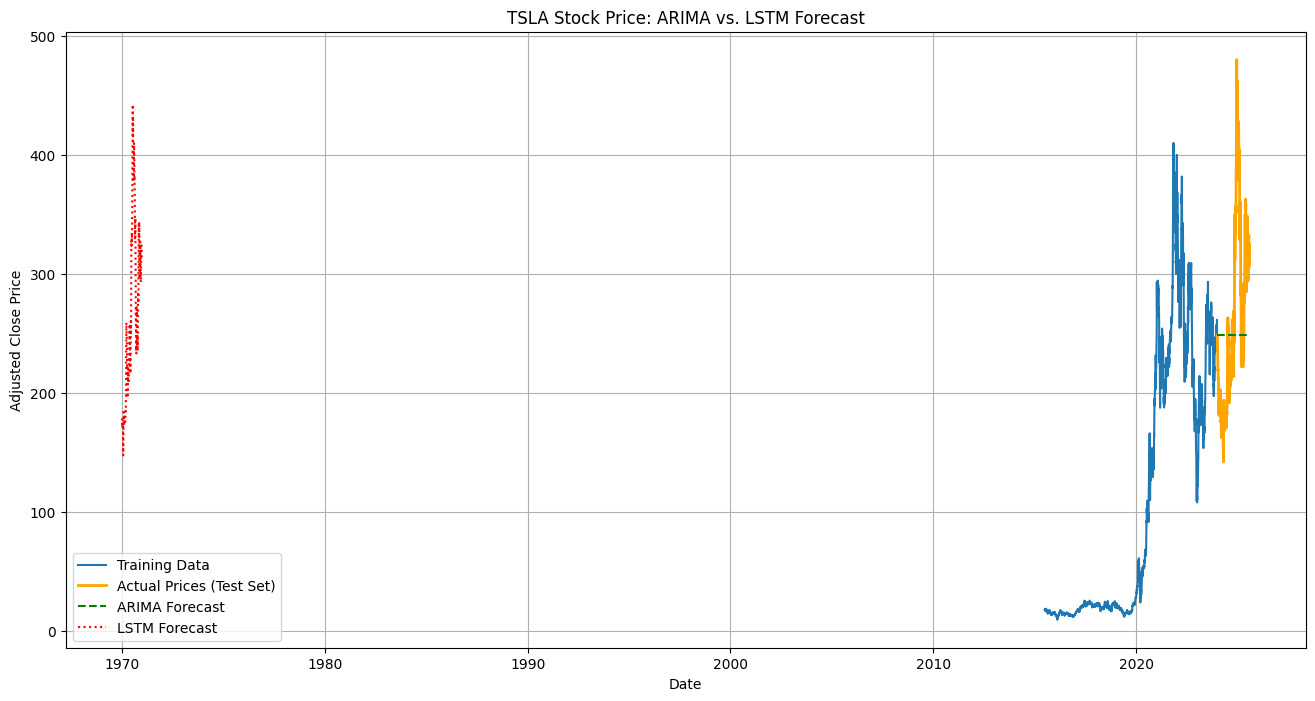

In [18]:
# This assumes you have the following variables ready:
# train, test, forecast_arima, forecast_lstm

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Plot historical data
plt.plot(train['Adj Close'], label='Training Data')
plt.plot(test['Adj Close'], label='Actual Prices (Test Set)', color='orange', linewidth=2)

# Plot the forecasts
plt.plot(forecast, label='ARIMA Forecast', color='green', linestyle='--')
plt.plot(lstm_forecast, label='LSTM Forecast', color='red', linestyle=':')

# Add titles and labels
plt.title('TSLA Stock Price: ARIMA vs. LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# --- ASSUMPTIONS ---
# This script assumes the following variables are already defined:
#
# train_df: A pandas DataFrame with a DatetimeIndex and an 'Adj Close' column for training.
# test_df: A pandas DataFrame with a DatetimeIndex and an 'Adj Close' column for testing.
# arima_forecast: A pandas Series containing the forecast from the ARIMA model.
# lstm_forecast_values: The raw NumPy array of predictions from the LSTM model.
# time_step: The integer used for the LSTM sequences (e.g., 60).


# --- 1. Correct the LSTM Forecast Index ---
# This is the key step to fix the 1970 date issue. We create a pandas Series
# that combines the LSTM predictions with the correct dates from the test set index.
forecast_index = .index[time_step : len(lstm_forecast) + time_step]
lstm_forecast = pd.Series(lstm_forecast.flatten(), index=forecast_index, name='LSTM Forecast')


# --- 2. Create the Plotly Figure ---

# Initialize an empty figure
fig = go.Figure()

# Add Training Data trace
fig.add_trace(go.Scatter(
    x=train_df.index, 
    y=train_df['Adj Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='royalblue')
))

# Add Actual Prices (Test Set) trace
fig.add_trace(go.Scatter(
    x=test_df.index, 
    y=test_df['Adj Close'],
    mode='lines',
    name='Actual Prices (Test Set)',
    line=dict(color='orange', width=3)
))

# Add ARIMA Forecast trace
fig.add_trace(go.Scatter(
    x=forecast.index, 
    y=forecast,
    mode='lines',
    name='ARIMA Forecast',
    line=dict(color='green', dash='dash')
))

# Add the correctly indexed LSTM Forecast trace
fig.add_trace(go.Scatter(
    x=lstm_forecast.index, 
    y=lstm_forecast,
    mode='lines',
    name='LSTM Forecast',
    line=dict(color='red', dash='dot')
))

# 3. Update the layout with titles, labels, and a clean theme
fig.update_layout(
    title='TSLA Stock Price: ARIMA vs. LSTM Forecast',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

# 4. Show the interactive plot
fig.show()